# Ensemble

This notebook discusses Multi-label ensemble methods for the [academia.stackexchange.com](https://academia.stackexchange.com/) data dump.

## Table of Contents
* [Data import](#data_import)
* [Methods](#methods)

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from joblib import dump, load
from academia_tag_recommender.classifier import Classifier, available_classifier_paths

RANDOM_STATE = 0

<a id='data_import'/>

## Data import

In [2]:
from academia_tag_recommender.test_train_data import get_X_reduced, get_y, get_test_train_data, get_all_labels
from academia_tag_recommender.preprocessing_definition import PreprocessingDefinition

preprocessing = PreprocessingDefinition('tfidf', 'basic', 'basic', 'english', '1,1', 'TruncatedSVD')

X = get_X_reduced(preprocessing)
y = get_y()
X_train, X_test, y_train, y_test = get_test_train_data(X, y)

C:\Users\Monique\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


<a id='methods'/>

## Methods

Algorithms in scikit-learn suited for Multi-label Ensembles:
- [ExtraTreesClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier)
- [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

scikit-multilearn:
- [RAkELo](http://scikit.ml/api/skmultilearn.ensemble.rakelo.html#skmultilearn.ensemble.RakelO)
- [RAkELd](http://scikit.ml/api/skmultilearn.ensemble.rakeld.html#skmultilearn.ensemble.RakelD)
- [MajorityVotingClassifier](http://scikit.ml/api/skmultilearn.ensemble.voting.html#skmultilearn.ensemble.MajorityVotingClassifier)
- [LabelSpacePartitioningClassifier](http://scikit.ml/api/skmultilearn.ensemble.partition.html#skmultilearn.ensemble.LabelSpacePartitioningClassifier)

In [3]:
clf_paths = []
def create_classifier(classifier, name=False):
    clf = Classifier(classifier, preprocessing, name)
    clf.fit(X_train, y_train)
    clf.score(X_test, y_test)
    path = clf.save('ensemble')
    print('Training: {}s'.format(clf.training_time))
    print('Test: {}s'.format(clf.test_time))
    clf.evaluation.print_stats()
    clf_paths.append(path)

**ExtraTreesClassifier**

In [4]:
from sklearn.ensemble import ExtraTreesClassifier

create_classifier(ExtraTreesClassifier(random_state=RANDOM_STATE))

Training: 1023.3491716384888s
Test: 51.83134388923645s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.013318985826531002     0.04693926929591096      6.048874909266876e-05    6.048874909266876e-05    6.048874909266876e-05    
micro                                                            0.3333333333333333       4.780800305971219e-05    9.560229445506691e-05    
macro                                                            0.005263157894736842     3.7946343869768146e-06   7.583801001061732e-06    


**RandomForestClassifier**

In [5]:
from sklearn.ensemble import RandomForestClassifier

create_classifier(RandomForestClassifier(random_state=RANDOM_STATE))

Training: 6211.661950349808s
Test: 12.817428588867188s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.013275051892979485     0.048149044277764334     0.01022259859666102      0.005135494797967578     0.0064843939027340895    
micro                                                            0.8269230769230769       0.004111488263135249     0.008182293896579611     
macro                                                            0.07472703497875123      0.002042679462556765     0.0038523404293700127    


**RAkEL**

> randomly breaking the initial set of labels into a number of small-sized labelsets, and employing [Label powerset] to train a corresponding multilabel classifier.
<cite>[Tsoumakas et al., 2011][1]</cite>


*RAkELo*

> Divides the label space in to m subsets of size k, trains a Label Powerset classifier for each subset and assign a label to an instance if more than half of all classifiers (majority) from clusters that contain the label assigned the label to the instance.
<cite>[skmultilearn][2]</cite>


[1]: https://doi.org/10.1109/TKDE.2010.164
[2]: http://scikit.ml/api/skmultilearn.ensemble.rakelo.html#skmultilearn.ensemble.RakelO

In [6]:
from skmultilearn.ensemble import RakelO
from sklearn.svm import LinearSVC

classifier = RakelO(
    base_classifier=LinearSVC(random_state=RANDOM_STATE),
    model_count=y_train.shape[1]
)
create_classifier(classifier)

C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of 

Training: 11677.108204126358s
Test: 146.43390727043152s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.015207508245571587     0.047060246794096296     0.3861661270686192       0.3136684410033067       0.3187852298788665       
micro                                                            0.4067508957194041       0.3093655877993976       0.35143648509205455      
macro                                                            0.47906313969202713      0.22769599620182526      0.2906524035508689       


In [7]:
from skmultilearn.ensemble import RakelO
from sklearn.linear_model import LogisticRegression

classifier = RakelO(
    base_classifier=LogisticRegression(random_state=RANDOM_STATE),
    model_count=y_train.shape[1]
)
create_classifier(classifier)

C:\Users\Monique\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

Training: 3828.7409257888794s
Test: 148.61050415039062s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.01341958816712723      0.062424389063634164     0.4203242196951367       0.29725784337446565      0.3224071449694484       
micro                                                            0.49360778322746646      0.29349333078357315      0.3681117707021647       
macro                                                            0.5553839625585044       0.18613967835452983      0.25989651168623623      


*RAkELd*

>Divides the label space in to equal partitions of size k, trains a Label Powerset classifier per partition and predicts by summing the result of all trained classifiers.
<cite>[skmultilearn][3]</cite>

[3]: http://scikit.ml/api/skmultilearn.ensemble.rakeld.html#skmultilearn.ensemble.RakelD

In [8]:
from skmultilearn.ensemble import RakelD

classifier = RakelD(base_classifier=LinearSVC(random_state=RANDOM_STATE))
create_classifier(classifier)

C:\Users\Monique\anaconda3\lib\site-packages\skmultilearn\cluster\random.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(label_sets)
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to con

Training: 3558.652092218399s
Test: 58.664090156555176s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.017434130935856457     0.032059037019114445     0.35602717577070353      0.3418723284135817       0.3188085646106454       
micro                                                            0.34344119356713815      0.3389587416933595       0.34118524578330645      
macro                                                            0.38784609695138406      0.2499246424201575       0.2884624465039655       


In [9]:
classifier = RakelD(base_classifier=LogisticRegression(random_state=RANDOM_STATE))
create_classifier(classifier)

C:\Users\Monique\anaconda3\lib\site-packages\skmultilearn\cluster\random.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(label_sets)
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfg

Training: 1287.9575905799866s
Test: 59.491294145584106s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.013629706979764922     0.059520929107186066     0.41799165831345847      0.30348616823937413      0.32578447710313185      
micro                                                            0.4813258993355228       0.30128603528230624      0.3705968832696266       
macro                                                            0.5466679845632149       0.19315456802931363      0.2665980844154815       


### Clustering

In [4]:
from skmultilearn.cluster import LabelCooccurrenceGraphBuilder
graph_builder = LabelCooccurrenceGraphBuilder(weighted=True, include_self_edges=False)

label_names = get_all_labels()

edge_map = graph_builder.transform(y_train)
print("{} labels, {} edges".format(len(label_names), len(edge_map)))
#print(edge_map)

190 labels, 7710 edges


In [19]:
from skmultilearn.cluster import IGraphLabelGraphClusterer
import igraph as ig

# we define a helper function for visualization purposes
def to_membership_vector(partition):
    return {
        member :  partition_id
        for partition_id, members in enumerate(partition)
        for member in members
    }

clusterer_igraph = IGraphLabelGraphClusterer(graph_builder=graph_builder, method='walktrap')
partition = clusterer_igraph.fit_predict(X_train, y_train)
print(partition)

colors = ['red', 'white', 'blue']
membership_vector = to_membership_vector(partition)
visual_style = {
    "vertex_size" : 20,
    "vertex_label": [x[0] for x in label_names],
    "edge_width" : [10*x/y_train.shape[0] for x in clusterer_igraph.graph_.es['weight']],
    "vertex_color": [colors[membership_vector[i]] for i in range(y_train.shape[1])],
    "bbox": (400,400),
    "margin": 80,
    "layout": clusterer_igraph.graph_.layout_circle()

}

#ig.plot(clusterer_igraph.graph_, **visual_style)

[list([0, 1, 3, 6, 7, 11, 14, 17, 19, 24, 25, 26, 27, 30, 31, 32, 36, 41, 44, 46, 50, 51, 58, 59, 63, 70, 75, 76, 77, 80, 88, 89, 90, 91, 95, 96, 97, 98, 99, 104, 110, 111, 112, 113, 114, 115, 116, 117, 120, 123, 124, 125, 132, 133, 134, 137, 139, 140, 141, 142, 143, 145, 150, 152, 154, 156, 158, 166, 167, 172, 175, 183, 184, 187, 188, 189])
 list([2, 4, 5, 8, 9, 10, 12, 13, 15, 16, 18, 20, 21, 22, 23, 28, 29, 33, 34, 35, 37, 38, 39, 40, 42, 43, 45, 47, 48, 49, 52, 53, 54, 55, 56, 57, 60, 61, 62, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 78, 79, 81, 82, 83, 84, 85, 86, 87, 92, 93, 94, 100, 101, 102, 103, 105, 106, 107, 108, 109, 118, 119, 121, 122, 126, 127, 128, 129, 130, 131, 135, 136, 138, 144, 146, 147, 148, 149, 151, 153, 155, 157, 159, 160, 161, 162, 163, 164, 165, 168, 169, 170, 171, 173, 174, 176, 177, 178, 179, 180, 181, 182, 185, 186])]


**MajorityVotingClassifier**

In [6]:
from skmultilearn.ensemble.voting import MajorityVotingClassifier
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression

classifier = MajorityVotingClassifier(
    classifier=ClassifierChain(classifier=LogisticRegression(random_state=RANDOM_STATE)),
    clusterer=clusterer_igraph
)
create_classifier(classifier, 'MajorityVotingClassifier(ClassifierChain(LogisticRegression))')

Training: 1431.5162394046783s
Test: 93.05138778686523s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.013129256030038821     0.06650544135429262      0.4213183048310013       0.30288794840789995      0.32499107502735075      
micro                                                            0.5114592882740229       0.2935661325041856       0.3730245562849501       
macro                                                            0.5466010123070143       0.18206753581388366      0.2553868275207446       


In [8]:
from sklearn.svm import LinearSVC

classifier = MajorityVotingClassifier(
    classifier=ClassifierChain(classifier=LinearSVC(random_state=RANDOM_STATE)),
    clusterer=clusterer_igraph
)
create_classifier(classifier, 'MajorityVotingClassifier(ClassifierChain(LinearSVC))')

C:\Users\Monique\anaconda3\lib\site-packages\skmultilearn\cluster\igraph.py:190: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, incr

Training: 2547.6452865600586s
Test: 93.82441854476929s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.016303061159549416     0.035671100362756954     0.37213206080497496      0.3511608222490932       0.3303801176654865       
micro                                                            0.3766104535456164       0.343984692657259        0.3595589889747243       
macro                                                            0.44622617735806613      0.25234185708489215      0.3073565522377556       


**LabelSpacePartitioningClassifier**

<cite>[Szymański et al., 2016][2]</cite>

[2]: https://doi.org/10.3390/e18080282

In [7]:
from skmultilearn.ensemble import LabelSpacePartitioningClassifier

classifier = LabelSpacePartitioningClassifier(
    classifier = ClassifierChain(classifier=LogisticRegression(random_state=RANDOM_STATE)),
    clusterer = clusterer_igraph
)
create_classifier(classifier, 'LabelSpacePartitioningClassifier(ClassifierChain(LogisticRegression))')

C:\Users\Monique\anaconda3\lib\site-packages\skmultilearn\cluster\igraph.py:190: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(


Training: 1424.3991949558258s
Test: 90.49828267097473s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.013129256030038821     0.06650544135429262      0.4213183048310013       0.30288794840789995      0.32499107502735075      
micro                                                            0.5114592882740229       0.2935661325041856       0.3730245562849501       
macro                                                            0.5466010123070143       0.18206753581388366      0.2553868275207446       


In [ ]:
classifier = LabelSpacePartitioningClassifier(
    classifier = ClassifierChain(classifier=LinearSVC(random_state=RANDOM_STATE)),
    clusterer = clusterer_igraph
)
create_classifier(classifier, 'LabelSpacePartitioningClassifier(ClassifierChain(LinearSVC))')

## Evaluation

In [9]:
paths = available_classifier_paths('ensemble')
evals = []
for path in paths:
    clf = load(path)
    evaluation = clf.evaluation
    evals.append([str(clf), evaluation])

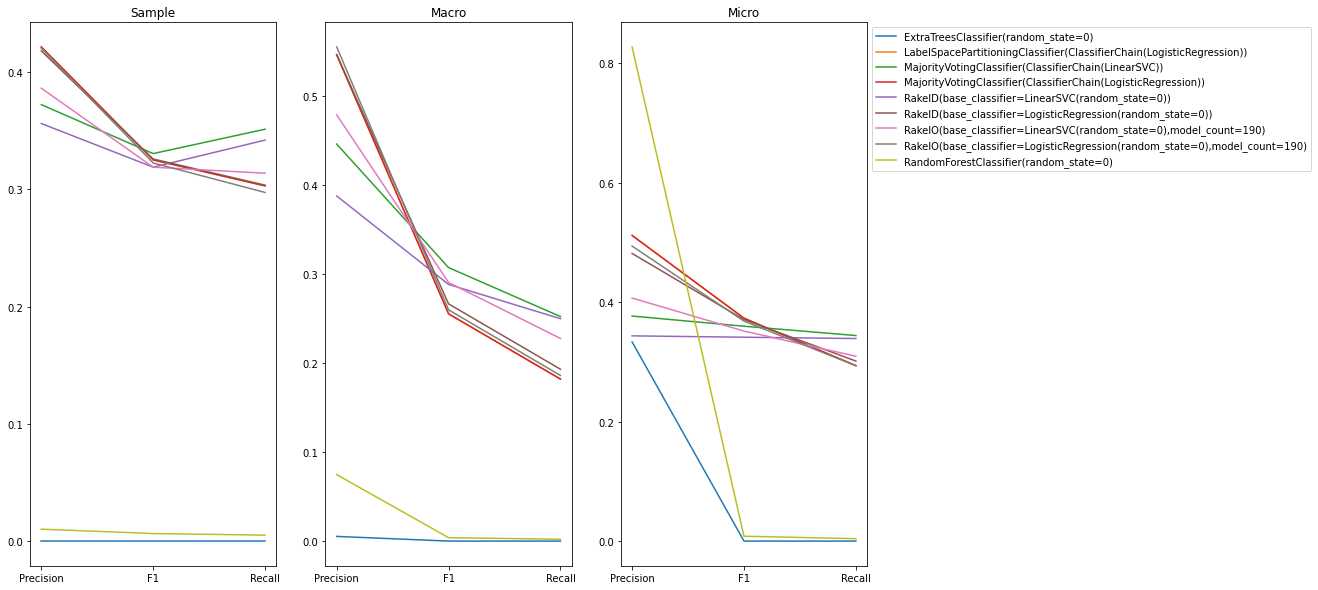

In [10]:
x_ = ['Precision', 'F1', 'Recall']
fig, axes = plt.subplots(1, 3, figsize=(15,10))
axes[0].set_title('Sample')
axes[1].set_title('Macro')
axes[2].set_title('Micro')
for eval_ in evals:
    evaluator = eval_[1]
    axes[0].plot(x_, [evaluator.precision_samples, evaluator.f1_samples, evaluator.recall_samples], label=eval_[0])
    axes[1].plot(x_, [evaluator.precision_macro, evaluator.f1_macro, evaluator.recall_macro], label=eval_[0])
    axes[2].plot(x_, [evaluator.precision_micro, evaluator.f1_micro, evaluator.recall_micro], label=eval_[0])
axes[2].legend(bbox_to_anchor=(1, 1), ncol=1)
plt.show()

In [11]:
top_3 = sorted(paths, key=lambda x: load(x).evaluation.sum(), reverse=True)[:3]

In [12]:
from sklearn.metrics import classification_report
classwise_results = []
for clf_path in top_3:
    clf = load(clf_path)
    prediction = clf.predict(X_test)
    classwise_results.append((clf, classification_report(y_test, prediction, output_dict=True, zero_division=0)))

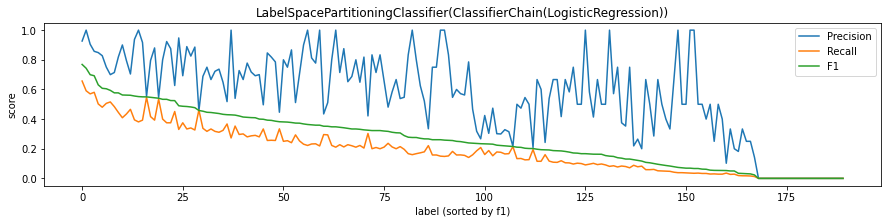

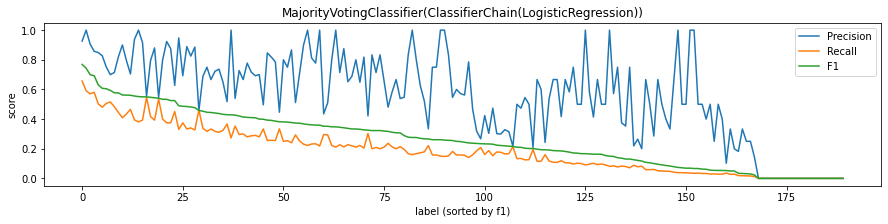

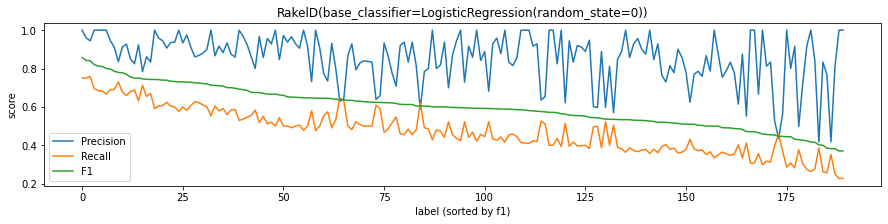

In [13]:
import numpy as np
x_ = np.arange(0, len(y_test[0]))
for classwise_result in classwise_results:
    name, results = classwise_result
    _, fig_1 = plt.subplots(figsize=(15,3))
    fig_1.set_title(name)
    sorted_results = sorted(results, key=lambda x: results[x]['f1-score'], reverse=True)
    fig_1.plot(x_, [results[result]['precision'] for result in sorted_results][0:len(x_)], label='Precision')
    fig_1.plot(x_, [results[result]['recall'] for result in sorted_results][0:len(x_)], label='Recall')
    fig_1.plot(x_, [results[result]['f1-score'] for result in sorted_results][0:len(x_)], label='F1')
    fig_1.set_xlabel('label (sorted by f1)')
    fig_1.set_ylabel('score')
    fig_1.legend(loc='best')
plt.show()